# Assignment 5

## Assignment 5.2

### General Assignment

Before performing the practice work, it is necessary to load the data set accordingly to the option on the disk.
1. Perform the scaling.
2. Using the scikit-learn library (http://scikit-learn.org/stable/), write a program using data clustering algorithms, which allows you to split the original sample into clusters corresponding to the proposed task (http://scikit-learn.org/stable/modules/clustering.html).
3. Perform experiments and determine the best algorithm for clustering, parameters of the algorithm. At least 3 algorithms must be used.
The results of experiments must be presented in the report (graphs, experimental procedure, conclusions).

### Options
Data sets are taken from the UCI Machine Learning Repository
https://archive.ics.uci.edu/ml/index.php

The option is determined by the data set, which can be downloaded from the link above:
1. Sponge
2. Water Treatment Plant
3. Synthetic Control Chart Time Series
4. Character Trajectories
5. Plants
6. Libras Movement
7. KEGG Metabolic Relation Network (Directed)
8. SMS Spam Collection
9. **seeds**
10. Human Activity Recognition Using Smartphones
11. User Knowledge Modeling
12. NYSK
13. Activities of Daily Living (ADLs) Recognition Using Binary Sensors
14. Dresses_Attribute_Sales
15. Wholesale customers
16. StoneFlakes
17. Gesture Phase Segmentation
18. AAAI 2014 Accepted Papers
19. Dow Jones Index
20. AAAI 2013 Accepted Papers
21. wiki4HE
22. Folio
23. Mice Protein Expression
24. Improved Spiral Test Using Digitized Graphics Tablet for Monitoring Parkinson’s Disease


In [1]:
import pandas as pd
import concurrent
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering, SpectralClustering, KMeans, AffinityPropagation, MeanShift
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.base import clone
from mpl_toolkits.mplot3d import Axes3D
from itertools import product

data = pd.read_csv('Assignment_Data/seeds_dataset.csv')
data.head()

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,wheat_type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [2]:
data.any().isnull()

area                       False
perimeter                  False
compactness                False
length_of_kernel           False
width_of_kernel            False
asymmetry_coefficient      False
length_of_kernel_groove    False
wheat_type                 False
dtype: bool

In [3]:
data.corr()

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,wheat_type
area,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
perimeter,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
compactness,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
length_of_kernel,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
width_of_kernel,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
asymmetry_coefficient,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
length_of_kernel_groove,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
wheat_type,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


In [4]:
# amount of classes to predict
len(data.wheat_type.unique())


3

In [5]:
features = ['area', 'perimeter', 'compactness','length_of_kernel','width_of_kernel','asymmetry_coefficient','length_of_kernel_groove']
target = ['wheat_type']
# Scale data
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features], data[target])

In [6]:
data.head()

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,wheat_type
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577,1
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013,1
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192,1
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983,1
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356,1


In [7]:
X = data[features]
y = data[target].apply(lambda x: x-1)
y = np.array(y).ravel()

## PCA

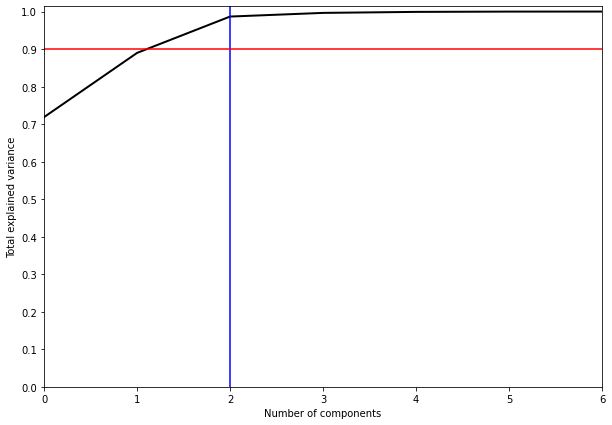

In [8]:
pca = PCA()
pca.fit(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 6)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(2, c='b')
plt.axhline(0.9, c='r')
plt.show()

In [9]:
pca = PCA(n_components=3)
pca.fit(X)

PCA(n_components=3)

3 principal components explain 98.67% of variance
(210, 3)


[Text(-2.0, 0, ''),
 Text(-1.0, 0, ''),
 Text(0.0, 0, ''),
 Text(1.0, 0, ''),
 Text(2.0, 0, ''),
 Text(3.0, 0, ''),
 Text(4.0, 0, '')]

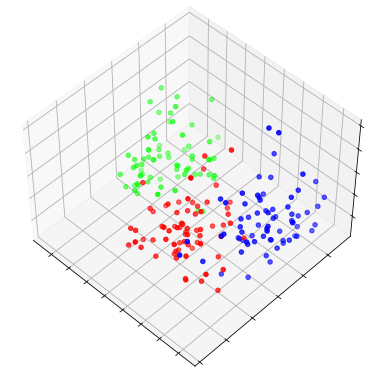

In [10]:
print('3 principal components explain %.2f%% of variance' %
      (100 * np.cumsum(pca.explained_variance_ratio_)[-1]))
X = pca.transform(X)
print(X.shape)

fig = plt.figure(1, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134, auto_add_to_figure=False)
fig.add_axes(ax)

plt.cla()
y_clr = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_clr,
           cmap=plt.cm.brg)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

In [11]:
algorithms = []
# custom GridSearch function with MULTITHREADING
def param_search(model, parameters:dict, X: pd.DataFrame, y: pd.DataFrame or np.array, scoring_function)->list:
    def combination_maker(params:dict)->list:
        keys = list(params.keys())
        param_lists = []
        for k in keys:
            param_lists.append(params.get(k))
        result = list(product(*param_lists))
        ret_val = []
        for i in range(0,len(result)):
            ret_val.append(dict(zip(keys,result[i])))
        return ret_val

    def evaluate_combination(model,params: dict)->float and dict:
        m = clone(model)
        m.set_params(**params)
        m.fit(X)
        return scoring_function(y,m.labels_),params

    param_data = []
    combinations = combination_maker(parameters)
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = [executor.submit(evaluate_combination,model=model, params=c) for c in combinations]
        param_data = [r.result() for r in futures]

    return param_data

## Scoring Function

In [12]:
scorer =  metrics.v_measure_score

## K-Means

In [13]:
n_init = [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
max_iter = [5,10,25, 50, 75, 100, 200, 300, 400, 500, 600]
tol = [1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
algorithm = ["full","elkan"]

model = KMeans(n_clusters = 3,random_state=42)


parameters={'algorithm': algorithm,'max_iter':max_iter ,'n_init': n_init, 'tol':tol}

result = param_search(model, parameters, X, y, scorer)

In [14]:
sorted_by_score = sorted(result, key=lambda item:item[0], reverse=True)

print(*sorted_by_score[:10], sep='\n')

algorithms.append(('K-Means',KMeans(n_clusters=3,
                         random_state=42,
                         algorithm=sorted_by_score[0][1]['algorithm'],
                         max_iter=sorted_by_score[0][1]['max_iter'],
                         n_init=sorted_by_score[0][1]['n_init'],
                         tol=sorted_by_score[0][1]['tol'])))

(0.7384069651104697, {'algorithm': 'full', 'max_iter': 5, 'n_init': 2, 'tol': 0.01})
(0.7384069651104697, {'algorithm': 'full', 'max_iter': 5, 'n_init': 2, 'tol': 0.001})
(0.7384069651104697, {'algorithm': 'full', 'max_iter': 5, 'n_init': 2, 'tol': 0.0001})
(0.7384069651104697, {'algorithm': 'full', 'max_iter': 5, 'n_init': 2, 'tol': 1e-05})
(0.7384069651104697, {'algorithm': 'full', 'max_iter': 5, 'n_init': 2, 'tol': 1e-06})
(0.7384069651104697, {'algorithm': 'full', 'max_iter': 5, 'n_init': 4, 'tol': 0.01})
(0.7384069651104697, {'algorithm': 'full', 'max_iter': 5, 'n_init': 4, 'tol': 0.001})
(0.7384069651104697, {'algorithm': 'full', 'max_iter': 5, 'n_init': 4, 'tol': 0.0001})
(0.7384069651104697, {'algorithm': 'full', 'max_iter': 5, 'n_init': 4, 'tol': 1e-05})
(0.7384069651104697, {'algorithm': 'full', 'max_iter': 5, 'n_init': 4, 'tol': 1e-06})


## Agglomerative Clustering/Hierarchical Clustering

In [15]:
affinity = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
compute_full_tree = [True, False]
linkage = ['complete', 'average', 'single']

model = AgglomerativeClustering(n_clusters=3)
parameters={'affinity':affinity,'compute_full_tree':compute_full_tree,'linkage':linkage}
result = param_search(model, parameters, X,y, metrics.v_measure_score)

In [16]:
sorted_by_score = sorted(result, key=lambda item:item[0], reverse=True)

print(*sorted_by_score[:10], sep='\n')

algorithms.append(('Agglomerative Clustering',AgglomerativeClustering(n_clusters=3,
                         affinity=sorted_by_score[0][1]['affinity'],
                         compute_full_tree=sorted_by_score[0][1]['compute_full_tree'],
                         linkage=sorted_by_score[0][1]['linkage'])))

(0.6733511865183034, {'affinity': 'l1', 'compute_full_tree': True, 'linkage': 'complete'})
(0.6733511865183034, {'affinity': 'l1', 'compute_full_tree': False, 'linkage': 'complete'})
(0.6733511865183034, {'affinity': 'manhattan', 'compute_full_tree': True, 'linkage': 'complete'})
(0.6733511865183034, {'affinity': 'manhattan', 'compute_full_tree': False, 'linkage': 'complete'})
(0.6663058783990584, {'affinity': 'cosine', 'compute_full_tree': True, 'linkage': 'average'})
(0.6663058783990584, {'affinity': 'cosine', 'compute_full_tree': False, 'linkage': 'average'})
(0.6460841820631407, {'affinity': 'euclidean', 'compute_full_tree': True, 'linkage': 'complete'})
(0.6460841820631407, {'affinity': 'euclidean', 'compute_full_tree': False, 'linkage': 'complete'})
(0.6460841820631407, {'affinity': 'l2', 'compute_full_tree': True, 'linkage': 'complete'})
(0.6460841820631407, {'affinity': 'l2', 'compute_full_tree': False, 'linkage': 'complete'})


## MeanShift

In [17]:
bandwidth = [None, 0.1,0.2,0.5,1,2,3,5]
cluster_all = [True, False]
max_iter = [5,10,25, 50, 75, 100, 200, 300, 400, 500, 600]

parameters = {'bandwidth': bandwidth, 'cluster_all':cluster_all, 'max_iter':max_iter}
model = MeanShift(n_jobs=-1)
result = param_search(model, parameters, X, y, scorer)

In [18]:
sorted_by_score = sorted(result, key=lambda item:item[0], reverse=True)

print(*sorted_by_score[:10], sep='\n')
algorithms.append(('MeanShift',MeanShift(n_jobs=-1,
                            bandwidth=sorted_by_score[0][1]['bandwidth'],
                            cluster_all=sorted_by_score[0][1]['cluster_all'],
                            max_iter=sorted_by_score[0][1]['max_iter'])))

(0.5775739822830309, {'bandwidth': None, 'cluster_all': True, 'max_iter': 5})
(0.5621963169793871, {'bandwidth': 2, 'cluster_all': True, 'max_iter': 5})
(0.5621963169793871, {'bandwidth': 2, 'cluster_all': True, 'max_iter': 10})
(0.5621963169793871, {'bandwidth': 2, 'cluster_all': True, 'max_iter': 25})
(0.5621963169793871, {'bandwidth': 2, 'cluster_all': True, 'max_iter': 50})
(0.5621963169793871, {'bandwidth': 2, 'cluster_all': True, 'max_iter': 75})
(0.5621963169793871, {'bandwidth': 2, 'cluster_all': True, 'max_iter': 100})
(0.5621963169793871, {'bandwidth': 2, 'cluster_all': True, 'max_iter': 200})
(0.5621963169793871, {'bandwidth': 2, 'cluster_all': True, 'max_iter': 300})
(0.5621963169793871, {'bandwidth': 2, 'cluster_all': True, 'max_iter': 400})


In [19]:
def three_d_plot(y_vals,title):
    fig = plt.figure(1, figsize=(6, 5))
    #plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134, auto_add_to_figure=False)
    fig.add_axes(ax)

    plt.cla()
    y_clr = np.choose(y_vals, [1, 2, 0]).astype(float)
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_clr, cmap=plt.cm.brg)

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

    plt.title(title)
    plt.show()

## Comparison

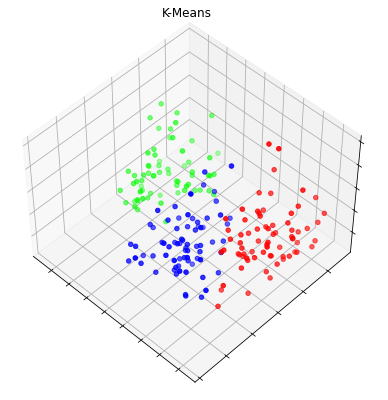

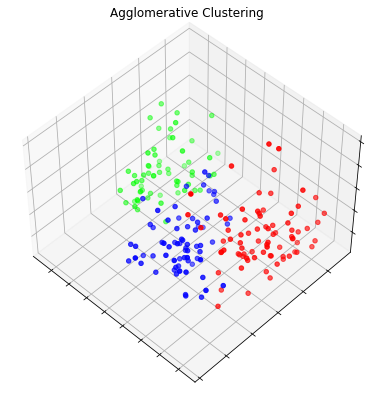

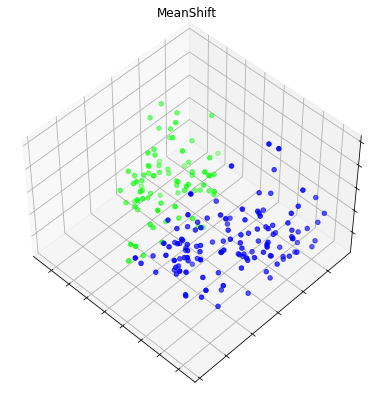

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-Means,0.785036,0.736089,0.738246,0.738568,0.738407,0.410082
Agglomerative Clustering,0.693872,0.670451,0.672014,0.674694,0.673351,0.392063
MeanShift,0.492674,0.575265,0.465178,0.761587,0.577574,0.464365


In [20]:
# Code taken from Lecture 06-01.pca_clustering.ipynb
data = []
for algo in algorithms:
    algo[1].fit(X)

    data.append(({
        'ARI': metrics.adjusted_rand_score(labels_true=y,labels_pred=algo[1].labels_),
        'AMI': metrics.adjusted_mutual_info_score(labels_true=y,labels_pred=algo[1].labels_),
        'Homogenity': metrics.homogeneity_score(labels_true=y,labels_pred=algo[1].labels_),
        'Completeness': metrics.completeness_score(labels_true=y,labels_pred=algo[1].labels_),
        'V-measure': metrics.v_measure_score(labels_true=y,labels_pred=algo[1].labels_),
        'Silhouette': metrics.silhouette_score(X, algo[1].labels_)}))

    three_d_plot(algo[1].labels_, algo[0])
results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure',
                                           'Silhouette'],
                       index=[a[0] for a in algorithms])

results